In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [14]:
emotion = pd.read_csv('text_emotion.csv')
print(emotion.shape)

(40000, 4)


In [15]:
emotion.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [16]:
emotion.isnull().any()

tweet_id     False
sentiment    False
author       False
content      False
dtype: bool

In [21]:
# checking out the negative comments from the emotion set

emotion[emotion['sentiment'] == 'hate'].head(10)


,tweet_id,sentiment,author,content
30,1956974706,hate,MavrickAces,It is so annoying when she starts typing on he...
86,1956987600,hate,naterkane,dammit! hulu desktop has totally screwed up my...
99,1956989601,hate,M0anique,@ cayogial i wanted to come to BZ this summer ...
101,1956990288,hate,MissPassion,@mrgenius23 You win ... SIGH Rakeem
105,1956991009,hate,rdyfrde,"@soviet_star Damn, that sucks"
107,1956991704,hate,Tweetyangie,@mileycyrus THIS WEBSITE GAVE ME A VIRUS! When...
121,1956996081,hate,snursalim,@IamYeTe Waraku is tasteless and expensive! Po...
124,1956996673,hate,Merekdavis,@britblackbird youstinkatrespondingtotexts!
160,1957004749,hate,golden_one,don't you hate it when you finish all your wor...
196,1957009666,hate,wendyisastar,@melluffsyew Umm yeah. That's probably a prett...


In [20]:
# checking out the postive comments from the emotion set 

emotion[emotion['sentiment'] == 'love'].head(10)

,tweet_id,sentiment,author,content
16,1956971170,love,poppygallico,@annarosekerr agreed
94,1956989093,love,Angela_Grace,@RobertF3 correct! I ADORE him. I just plucked...
122,1956996385,love,votech,@freepbx sounds good. Appreciate the suggestio...
131,1956998370,love,rockinchick11,Pats in philly at 2 am. I love it. Mmm cheeses...
151,1957002773,love,UncoolRockstar,@NisforNeemah thanks neemah. I'm gonna be sooo...
210,1957013804,love,jammmaster1021,@bobbyedner i missed the game
397,1957059587,love,Pretty_Edgie,@neyoofficial: love the song &quot;together&qu...
408,1957062698,love,ShirleyValverde,I want to go to Peru this summer ahhhhhhh! Hop...
438,1957072400,love,kaboyd5,Pug just woke me from an incredible sleep!
439,1957072637,love,destinyhope92,@ddlovato i can`t wait to hear your new album....


<AxesSubplot:>

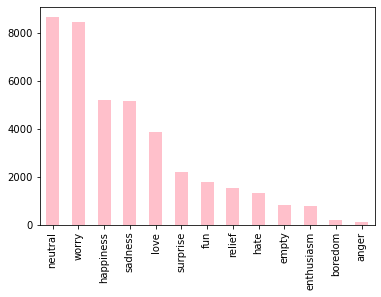

In [22]:
emotion['sentiment'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

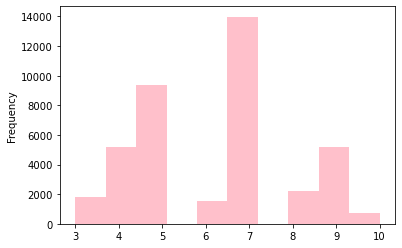

In [24]:
# checking the distribution of tweet in the data

length_emotion = emotion['sentiment'].str.len().plot.hist(color = 'pink', figsize = (6, 4))

In [25]:
# adding a column to represent the length of the tweet

emotion['len'] = emotion['sentiment'].str.len()

emotion.head(10)

,tweet_id,sentiment,author,content,len
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,5
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,7
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,7
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,10
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,7
5,1956968477,worry,xxxPEACHESxxx,Re-pinging @ghostridah14: why didn't you go to...,5
6,1956968487,sadness,ShansBee,"I should be sleep, but im not! thinking about ...",7
7,1956968636,worry,mcsleazy,Hmmm. http://www.djhero.com/ is down,5
8,1956969035,sadness,nic0lepaula,@charviray Charlene my love. I miss you,7
9,1956969172,sadness,Ingenue_Em,@kelcouch I'm sorry at least it's Friday?,7


In [26]:
emotion.groupby('sentiment').describe()

tweet_id                                                          \
              count          mean           std           min           25%   
sentiment                                                                     
anger         110.0  1.901446e+09  1.054069e+08  1.694054e+09  1.804612e+09   
boredom       179.0  1.912465e+09  9.565245e+07  1.694034e+09  1.957196e+09   
empty         827.0  1.858058e+09  1.193787e+08  1.693956e+09  1.751610e+09   
enthusiasm    759.0  1.808281e+09  1.142946e+08  1.693957e+09  1.695731e+09   
fun          1776.0  1.790245e+09  1.055019e+08  1.693957e+09  1.695758e+09   
happiness    5209.0  1.769092e+09  9.199737e+07  1.693956e+09  1.695341e+09   
hate         1323.0  1.915780e+09  9.406515e+07  1.693957e+09  1.957250e+09   
love         3842.0  1.780366e+09  9.581246e+07  1.693957e+09  1.695963e+09   
neutral      8638.0  1.827028e+09  1.190011e+08  1.693956e+09  1.696002e+09   
relief       1526.0  1.793640e+09  1.096695e+08  1.693958e+09  1.695442e+09   
sadness      5165.0  1.928605e+09  8.350930e+07  1.693975e+09  1.957549e+09   
surprise     2187.0  1.841813e+09  1.183997e+08  1.693956e+09  1.751395e+09   
worry        8459.0  1.899646e+09  1.053726e+08  1.693957e+09  1.753714e+09   

                                                         len                   \
                     50%           75%           max   count  mean  std   min   
sentiment                                                                       
anger       1.961382e+09  1.963961e+09  1.966274e+09   110.0   5.0  0.0   5.0   
boredom     1.961888e+09  1.963881e+09  1.966412e+09   179.0   7.0  0.0   7.0   
empty       1.957507e+09  1.963576e+09  1.966428e+09   827.0   5.0  0.0   5.0   
enthusiasm  1.753050e+09  1.960939e+09  1.966436e+09   759.0  10.0  0.0  10.0   
fun         1.752646e+09  1.957247e+09  1.966409e+09  1776.0   3.0  0.0   3.0   
happiness   1.752228e+09  1.753618e+09  1.966425e+09  5209.0   9.0  0.0   9.0   
hate        1.961568e+09  1.964329e+09  1.966440e+09  1323.0   4.0  0.0   4.0   
love        1.752647e+09  1.753758e+09  1.966435e+09  3842.0   4.0  0.0   4.0   
neutral     1.753467e+09  1.962106e+09  1.966441e+09  8638.0   7.0  0.0   7.0   
relief      1.752605e+09  1.957742e+09  1.966440e+09  1526.0   6.0  0.0   6.0   
sadness     1.962137e+09  1.964396e+09  1.966440e+09  5165.0   7.0  0.0   7.0   
surprise    1.753805e+09  1.962433e+09  1.966441e+09  2187.0   8.0  0.0   8.0   
worry       1.961225e+09  1.963902e+09  1.966441e+09  8459.0   5.0  0.0   5.0   

                                    
             25%   50%   75%   max  
sentiment                           
anger        5.0   5.0   5.0   5.0  
boredom      7.0   7.0   7.0   7.0  
empty        5.0   5.0   5.0   5.0  
enthusiasm  10.0  10.0  10.0  10.0  
fun          3.0   3.0   3.0   3.0  
happiness    9.0   9.0   9.0   9.0  
hate         4.0   4.0   4.0   4.0  
love         4.0   4.0   4.0   4.0  
neutral      7.0   7.0   7.0   7.0  
relief       6.0   6.0   6.0   6.0  
sadness      7.0   7.0   7.0   7.0  
surprise     8.0   8.0   8.0   8.0  
worry        5.0   5.0   5.0   5.0

//emotion.groupby('len').mean()['sentiment'].plot.hist(color = 'black', figsize = (6, 4),)//
//plt.title('variation of length')//
//plt.xlabel('Length')//
//plt.show()//


Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

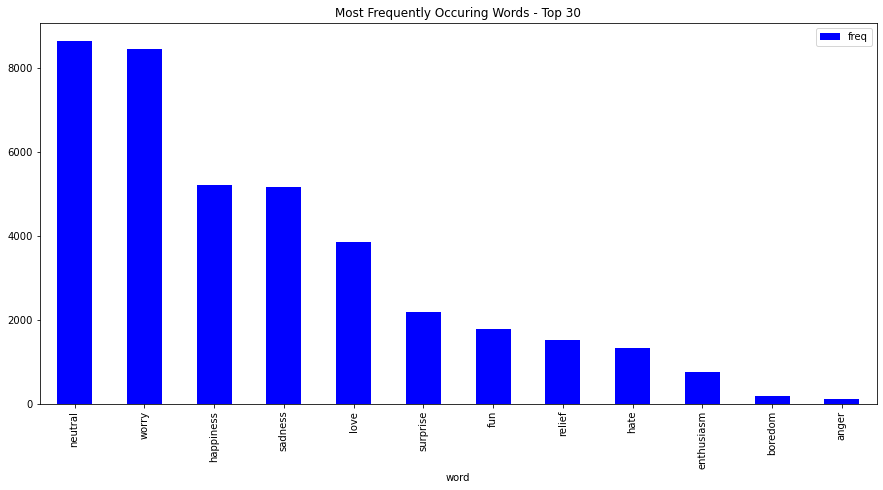

In [32]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(emotion.sentiment)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

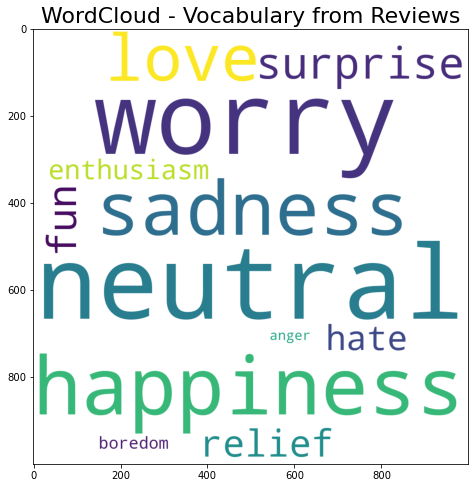

In [34]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)


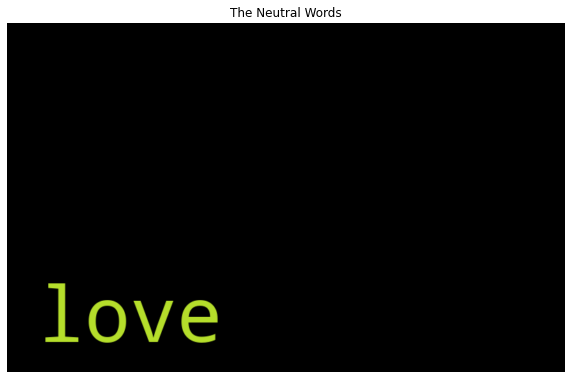

In [40]:
normal_words =' '.join([text for text in emotion['sentiment'][emotion['sentiment'] == 'love']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

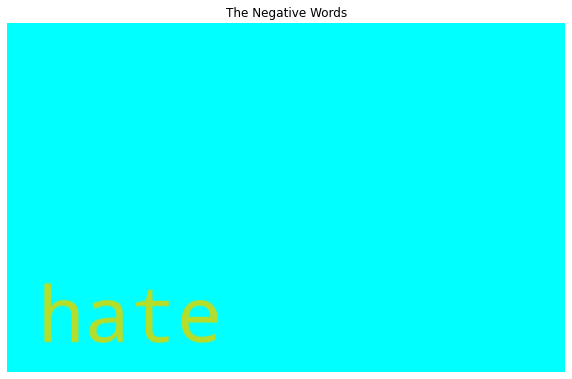

In [42]:
negative_words =' '.join([text for text in emotion['sentiment'][emotion['sentiment'] == 'hate']])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

In [51]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [54]:
import re
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(emotion['content'][emotion['sentiment'] == 'love'])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(emotion['content'][emotion['sentiment'] == 'worry'])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

In [58]:

import nltk


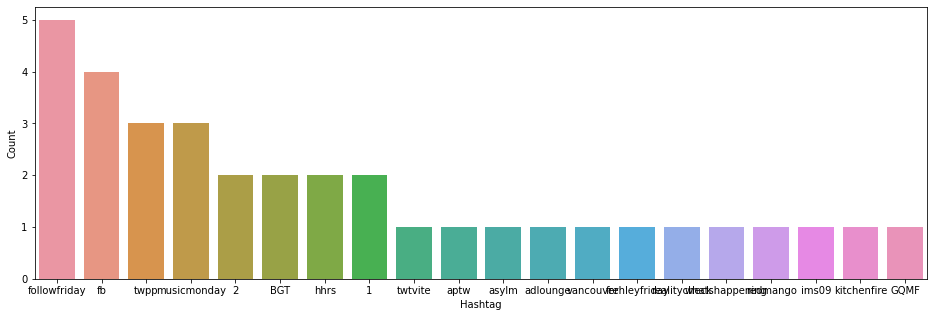

In [59]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

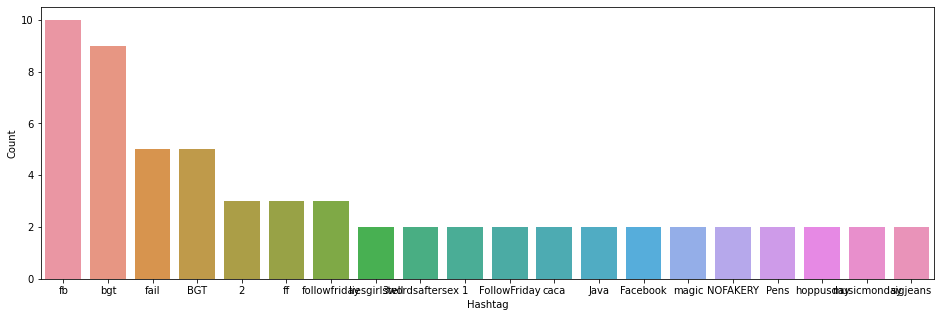

In [60]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()